<h1><center>Deep Learning</center></h1>
<h2><center>Assignment # 2</center></h2>
<h3><center>Task # 2</center></h3>

In [1]:
# Include libraries which may use in implementation
import numpy as np
import random
import sklearn.datasets as ds
import matplotlib.pyplot as plt
import sklearn.model_selection as sk
from sklearn.metrics import confusion_matrix
import pickle
%matplotlib inline


In [2]:
# Create a Neural_Network class
class Neural_Network(object):        
    def __init__(self,inputSize = 2,hiddenlayer = 3, outputSize = 1, activation = 'sigmoid' ):        
        # size of layers
        self.inputSize = inputSize
        self.outputSize = outputSize 
        self.hiddenLayer = hiddenlayer
        # activation function
        self.activation = activation
        #weights
        self.W1 = np.random.rand(inputSize + 1, hiddenlayer) #? # randomly initialize W1 using random function of numpy
        # size of the wieght will be (inputSize +1, hiddenlayer) that +1 is for bias    
        self.W2 = np.random.rand(hiddenlayer + 1, outputSize) #? # randomly initialize W2 using random function of numpy
        # size of the wieght will be (hiddenlayer +1, outputSize) that +1 is for bias    
        
    def feedforward(self, X): #forward propagation through our network
        # dot product of X (input) and set of weights
        #print(X)
        #print(self.W1)
        z_hidden = np.dot(self.W1, X) # W1[0][0], W1[1][0], W1[2][0] are biases
        #print(z_hidden)
        if self.activation == 'sigmoid':
            a_hidden = self.sigmoid(z_hidden)
        elif self.activation == 'tanh':
            a_hidden = self.tanh(z_hidden)
        elif self.activation == 'relu':
            a_hidden = self.relu(z_hidden)
        else:
            print("unknown activation function")
        #print(a_hidden)
        k = np.insert(a_hidden, 0,1)
        #print(k)
        #print(self.W2)
        z_output = np.dot(k,self.W2) # W2[0][0] is bias
        #print(z_output)
        a_output = self.sigmoid(z_output) #always using logistic in o/p layer
        
        #if self.activation == 'sigmoid':
        #    a_output = self.sigmoid(z_output)
        #elif self.activation == 'tanh':
        #    a_output = self.tanh(z_output)
        #elif self.activation == 'relu':
        #    a_output = self.relu(z_output)
        #else:
        #    print("unknown activation function")
        
        #print(a_output)
        # apply activation function (i.e. whatever function was passed in initialization) 
        #output = []
        #output.append(z_hidden, a_hidden, z_output, a_output)
        return [z_hidden, a_hidden, z_output, a_output] #? # return your answer with as a final output of the network

    def sigmoid(self, s):
        # activation function
        return (1/(1+np.exp(-s))) #? # apply sigmoid function on s and return it's value

    def sigmoid_derivative(self, s):
        #derivative of sigmoid
        return self.sigmoid(s)*(1-self.sigmoid(s)) #? # apply derivative of sigmoid on s and return it's value 
    
    def tanh(self, s):
        # activation function
        return np.tanh(s) #? # apply tanh function on s and return it's value

    def tanh_derivative(self, s):
        #derivative of tanh
        return (1-(self.tanh(s))**2) #? # apply derivative of tanh on s and return it's value
    
    def relu(self, s):
        # activation function
        #print(s)
        s_ = s
        for i in range(len(s)):
            if s[i] < 0:
                s_[i] = 0
        return s_ #? # apply relu function on s and return it's value

    def relu_derivative(self, s):
        #derivative of relu
        #print(s)
        s_ = s
        for i in range(len(s)):
            if s[i] < 0:
                s_[i] = 0
            elif s[i] >= 0:
                s_[i] = 1
        return s_  #? # apply derivative of relu on s and return it's value

    def backwardpropagate(self,X, Y, y_pred, lr):
        # backward propagate through the network
        # compute error in output which is loss compute cross entropy loss function
        ### y_pred = [z_hidden, a_hidden, z_output, a_output]
        
        #output layer gradients 
        Loss = self.crossentropy(Y,y_pred[3])
        dz_output = (y_pred[3] - Y) # delta_l+1 ### #always using logistic in o/p layer 
        dL_wrt_OutputLayerWeights = np.multiply(np.subtract(y_pred[3] ,Y) , y_pred[1])
        dL_wrt_outputLayerBias = np.subtract(y_pred[3] ,Y)
        
        # hidden layer gradients
        if self.activation == 'sigmoid':
            derivatives = self.sigmoid_derivative(y_pred[1])
            derivatives = np.insert(derivatives, 0, 1)
            derivative_of_ahidden = []
            for entry in derivatives:
                derivative_of_ahidden.append([entry])
            OutputLayerWeights_multiplied_by_dz_output = np.multiply(dz_output, self.W2)
            dz_hidden = np.multiply(OutputLayerWeights_multiplied_by_dz_output, derivative_of_ahidden) 
            dL_wrt_HiddenLayerWeights = np.outer(dz_hidden, X) #ignore its first row
            # [ 1*?        x_1*?        x_2*?
            #   delta1    delta1*x1    delta1*x2
            #   delta2    delta2*x1    delta2*x2
            #   delta3    delta3*x1    delta3*x2 ]
            dL_wrt_hiddenLayerBias = dz_hidden #ignore first index # no need of this    
        
        elif self.activation == 'tanh':
            derivatives = self.tanh_derivative(y_pred[1])
            derivatives = np.insert(derivatives, 0, 1)
            derivative_of_ahidden = []
            for entry in derivatives:
                derivative_of_ahidden.append([entry])
            OutputLayerWeights_multiplied_by_dz_output = np.multiply(dz_output, self.W2)
            dz_hidden = np.multiply(OutputLayerWeights_multiplied_by_dz_output, derivative_of_ahidden) 
            dL_wrt_HiddenLayerWeights = np.outer(dz_hidden, X) #ignore its first row
            dL_wrt_hiddenLayerBias = dz_hidden #ignore first index # no need of this 
            
        elif self.activation == 'relu':
            derivatives = self.relu_derivative(y_pred[1])
            derivatives = np.insert(derivatives, 0, 1)
            derivative_of_ahidden = []
            for entry in derivatives:
                derivative_of_ahidden.append([entry])
            OutputLayerWeights_multiplied_by_dz_output = np.multiply(dz_output, self.W2)
            dz_hidden = np.multiply(OutputLayerWeights_multiplied_by_dz_output, derivative_of_ahidden) 
            dL_wrt_HiddenLayerWeights = np.outer(dz_hidden, X) #ignore its first row
            dL_wrt_hiddenLayerBias = dz_hidden #ignore first index # no need of this 
        else:
            print("unknown activation function")
            
        # applying derivative of that applied activation function to the error
        # adjust set of weights
        w_grad = []
        for entry in dL_wrt_OutputLayerWeights:
            w_grad.append([entry])
        self.W2[0] = np.subtract(self.W2[0] , np.multiply(lr,dL_wrt_outputLayerBias)) # adjust set of weights
        self.W2[1:4] = np.subtract(self.W2[1:4] , np.multiply(lr,w_grad)) 
        self.W1 = np.subtract(self.W1, np.multiply(lr, dL_wrt_HiddenLayerWeights[1:4] ))
        
        return Loss
    
    def crossentropy(self, Y, Y_pred):
        # compute error based on crossentropy loss 
        L = -(np.multiply(Y,np.log(Y_pred)) + np.multiply(1-Y,np.log(1-Y_pred)))
        return L #error

    def train(self, trainX, trainY,epochs = 100, learningRate = 0.001, plot_err = True ,validationX = 'NULL', validationY = 'NULL'):
        Loss =[]
        epochs_list=[]
        Train_Accuracy =[]
        Valid_Accuracy =[]
        for epoch in range(epochs):
            Loss_in_one_epoch = 0.0
            epochs_list.append(epoch)
            for i in range(len(trainX)):
                sample = np.insert(trainX[i],0,1) #inserting 1's to be multiplied with biases
                # feed forward trainX and trainY and recivce predicted value
                Y_predicted = self.feedforward(sample)
                # backpropagation with trainX, trainY, predicted value and learning rate.
                loss = self.backwardpropagate(sample, trainY[i], Y_predicted, learningRate) 
                Loss_in_one_epoch = Loss_in_one_epoch + loss
            
            ### calculating loss ###
            Loss_in_one_epoch = Loss_in_one_epoch / len(trainX)
            Loss.append(Loss_in_one_epoch)
            ### calculating accuracy ###
            train_accuracy = self.accuracy(trainX,trainY)
            Train_Accuracy.append(train_accuracy)
            print("At epoch ",epoch, "loss is: ", Loss_in_one_epoch, "accuracy is: ", train_accuracy)
    
            # if validationX and validationY are not null than show validation accuracy and error of the model.
            if validationX != 'NULL':
                valid_accuracy = self.accuracy(validationX,validationY)
                print("At epoch ",epoch, "validation accuracy is ", valid_accuracy)
                Valid_Accuracy.append(valid_accuracy)
        
        # plot error of the model if plot_err is true
        if plot_err:
            plt.plot(epochs_list,Loss,'bo')
            plt.xlabel('epoch number')
            plt.ylabel('Cross Entropy loss')
            plt.show()
            plt.plot(epochs_list,Train_Accuracy)
            plt.xlabel('epoch number')
            plt.ylabel('Training Accuracy')
            plt.show()
            if validationX != 'NULL':
                plt.plot(epochs_list,Valid_Accuracy)
                plt.xlabel('epoch number')
                plt.ylabel('Validation Accuracy')
                plt.show()
        
    def predict(self, testX):
        test_set = np.insert(testX,0,1, axis = 1)
        predicted_test_values = []
        for i in range(len(testX)):
            sample = np.insert(testX[i],0,1)
            Y_predicted = self.feedforward (sample)
            predicted_test_values.append(Y_predicted[3])
        
        #print(predicted_test_values)
        predY= []
        for i in range(len(predicted_test_values)):
            if predicted_test_values[i] >= 0.5:
                predY.append(1)
            if predicted_test_values[i] < 0.5:
                predY.append(0)
        return predY
        
    
    def accuracy(self, testX, testY,test = False):
        #print("inside accuracy")
        pred_y = self.predict(testX) # predict the value of testX
        #print(pred_y)
       
        # compare it with testY
        accuracy = float(np.sum(pred_y == testY))/len(testY)
        # compute accuracy, print it and show in the form of picture
        
        if test:
            bar_label = ['Testing Accuracy']
            bar_index = np.arange(len(bar_label))
            plt.bar(bar_index,accuracy)
            #plt.xlabel('Testing')
            #plt.ylabel('Accuracy')
            plt.xticks(bar_index, bar_label, fontsize=10, rotation=0)
            plt.show()
            #plt.plot(accuracy)
        
        '''
        class_labels = ['0', '1']
        cnf_mat = confusion_matrix(testY, predY)
        plt.imshow(cnf_mat, cmap=plt.cm.Blues)#, interpolation='nearest'), cmap=plt.cm.Blues)
        plt.title("Confusion Matrix")
        plt.colorbar()
        tick_marks = np.arange(len(class_labels))
        plt.xticks(tick_marks, class_labels)#, rotation=45)
        plt.yticks(tick_marks, class_labels)
        
        plt.tight_layout()
        plt.ylabel('True label')
        plt.xlabel('Predicted label')
        plt.show()
        '''
        return accuracy #? # return accuracy       
        
    def saveModel(self,name):
        pickle.dump(self, open(name, 'wb'))
        # save your trained model, it is your interpretation how, which and what data you store
        # which you will use later for prediction
        #pass

        
    def loadModel(self,name):
        #new_model = pickle.load(open(name, 'rb'))
        #self.inputSize = new_model.inputSize
        #self.outputSize = new_model.outputSize 
        #self.hiddenLayer = new_model.hiddenlayer
        # activation function
        #self.activation = new_model.activation
        #weights
        #self.W1 = new_model.W1   
        #self.W2 = new_model.W2
        return pickle.load(open(name, 'rb'))
        # load your trained model, load exactly how you stored it.
        #pass

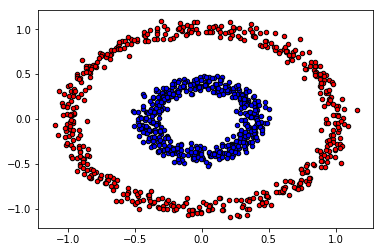

In [3]:
data, label = ds.make_circles(n_samples=1000, factor=.4, noise=0.05)

#Lets visualize the dataset
reds = label == 0
blues = label == 1
plt.scatter(data[reds, 0], data[reds, 1], c="red", s=20, edgecolor='k')
plt.scatter(data[blues, 0], data[blues, 1], c="blue", s=20, edgecolor='k')
plt.show()


In [4]:
#Note: shuffle this dataset before dividing it into three parts
# Distribute this data into three parts i.e. training, validation and testing
train_X, testX, train_Y, testY =  sk.train_test_split(data,label,test_size=0.2, shuffle=True,stratify=label) #?# training data point
trainX, validX, trainY, validY = sk.train_test_split(train_X,train_Y,test_size=0.25, shuffle=True,stratify=train_Y)


At epoch  0 loss is:  [0.6951568] accuracy is:  0.4266666666666667
At epoch  0 validation accuracy is  0.45
At epoch  1 loss is:  [0.64036601] accuracy is:  0.8466666666666667
At epoch  1 validation accuracy is  0.845


c:\python36\lib\site-packages\ipykernel_launcher.py:181: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


At epoch  2 loss is:  [0.50959816] accuracy is:  0.9083333333333333
At epoch  2 validation accuracy is  0.915
At epoch  3 loss is:  [0.33648621] accuracy is:  1.0
At epoch  3 validation accuracy is  1.0
At epoch  4 loss is:  [0.20934632] accuracy is:  1.0
At epoch  4 validation accuracy is  1.0
At epoch  5 loss is:  [0.14998988] accuracy is:  1.0
At epoch  5 validation accuracy is  1.0
At epoch  6 loss is:  [0.11621961] accuracy is:  1.0
At epoch  6 validation accuracy is  1.0
At epoch  7 loss is:  [0.09470404] accuracy is:  1.0
At epoch  7 validation accuracy is  1.0
At epoch  8 loss is:  [0.07991131] accuracy is:  1.0
At epoch  8 validation accuracy is  1.0
At epoch  9 loss is:  [0.06914822] accuracy is:  1.0
At epoch  9 validation accuracy is  1.0
At epoch  10 loss is:  [0.06097268] accuracy is:  1.0
At epoch  10 validation accuracy is  1.0
At epoch  11 loss is:  [0.05455196] accuracy is:  1.0
At epoch  11 validation accuracy is  1.0
At epoch  12 loss is:  [0.04937449] accuracy is: 

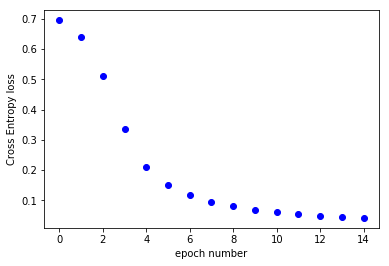

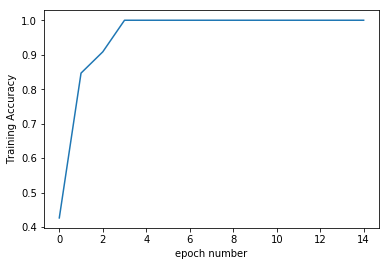

c:\python36\lib\site-packages\ipykernel_launcher.py:196: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


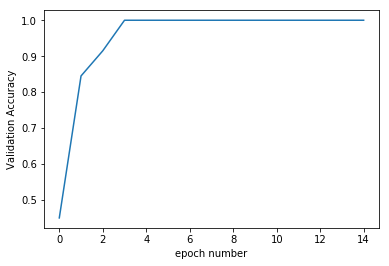

In [5]:
modelx = Neural_Network(2,3,1, 'tanh')
# try different combinations of epochs and learning rate
modelx.train(trainX, trainY, epochs = 15, learningRate = 0.1, validationX = validX, validationY = validY)

In [6]:
test_accuracy = modelx.accuracy(testX, testY)
test_accuracy

1.0

In [7]:
modelx.saveModel('task2_bestmodel.mdl')

c:\python36\lib\site-packages\ipykernel_launcher.py:181: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


At epoch  0 loss is:  [0.6725951] accuracy is:  0.585
At epoch  0 validation accuracy is  0.53
At epoch  1 loss is:  [0.66972023] accuracy is:  0.595
At epoch  1 validation accuracy is  0.54
At epoch  2 loss is:  [0.66779777] accuracy is:  0.5983333333333334
At epoch  2 validation accuracy is  0.56
At epoch  3 loss is:  [0.66618672] accuracy is:  0.6
At epoch  3 validation accuracy is  0.56
At epoch  4 loss is:  [0.66478736] accuracy is:  0.6133333333333333
At epoch  4 validation accuracy is  0.585
At epoch  5 loss is:  [0.66349779] accuracy is:  0.615
At epoch  5 validation accuracy is  0.6
At epoch  6 loss is:  [0.66227695] accuracy is:  0.6316666666666667
At epoch  6 validation accuracy is  0.61
At epoch  7 loss is:  [0.66112898] accuracy is:  0.6416666666666667
At epoch  7 validation accuracy is  0.615
At epoch  8 loss is:  [0.66004696] accuracy is:  0.66
At epoch  8 validation accuracy is  0.635
At epoch  9 loss is:  [0.65903083] accuracy is:  0.6666666666666666
At epoch  9 valida

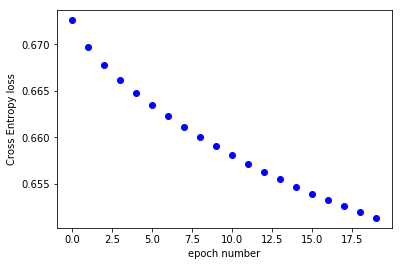

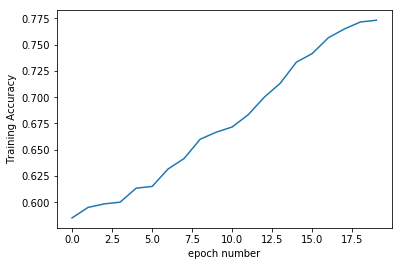

c:\python36\lib\site-packages\ipykernel_launcher.py:196: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


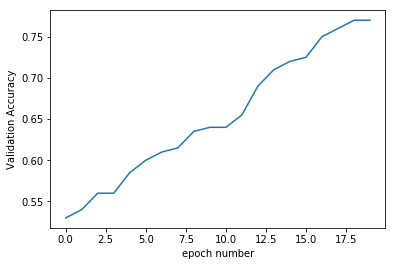

0.77


In [40]:
model1 = Neural_Network(2,3,1, 'relu')
model1.train(trainX, trainY, epochs = 20, learningRate = 0.005, validationX = validX, validationY = validY)
test_accuracy = model1.accuracy(testX, testY)
print(test_accuracy)

At epoch  0 loss is:  [0.64794874] accuracy is:  0.7866666666666666
At epoch  0 validation accuracy is  0.795
At epoch  1 loss is:  [0.64704797] accuracy is:  0.7916666666666666
At epoch  1 validation accuracy is  0.8


c:\python36\lib\site-packages\ipykernel_launcher.py:181: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


At epoch  2 loss is:  [0.64654888] accuracy is:  0.79
At epoch  2 validation accuracy is  0.8
At epoch  3 loss is:  [0.64620458] accuracy is:  0.79
At epoch  3 validation accuracy is  0.8
At epoch  4 loss is:  [0.64592879] accuracy is:  0.7883333333333333
At epoch  4 validation accuracy is  0.795


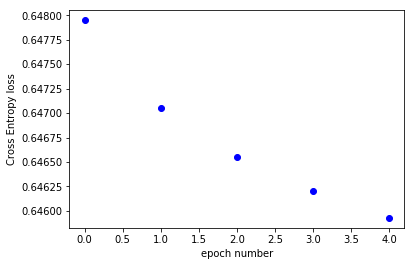

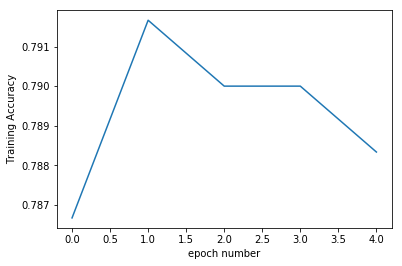

c:\python36\lib\site-packages\ipykernel_launcher.py:196: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


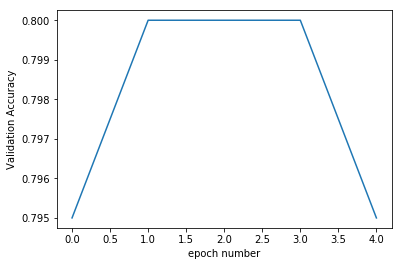

In [42]:
model1.train(trainX, trainY, epochs = 5, learningRate = 0.001, validationX = validX, validationY = validY)

At epoch  0 loss is:  [0.64585444] accuracy is:  0.79
At epoch  0 validation accuracy is  0.8
At epoch  1 loss is:  [0.64578827] accuracy is:  0.79


c:\python36\lib\site-packages\ipykernel_launcher.py:181: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


At epoch  1 validation accuracy is  0.79
At epoch  2 loss is:  [0.64572628] accuracy is:  0.7883333333333333
At epoch  2 validation accuracy is  0.79
At epoch  3 loss is:  [0.64566817] accuracy is:  0.79
At epoch  3 validation accuracy is  0.785
At epoch  4 loss is:  [0.64561334] accuracy is:  0.7883333333333333
At epoch  4 validation accuracy is  0.79
At epoch  5 loss is:  [0.64556149] accuracy is:  0.7883333333333333
At epoch  5 validation accuracy is  0.785
At epoch  6 loss is:  [0.64551231] accuracy is:  0.7866666666666666
At epoch  6 validation accuracy is  0.79
At epoch  7 loss is:  [0.64546556] accuracy is:  0.7883333333333333
At epoch  7 validation accuracy is  0.79
At epoch  8 loss is:  [0.645421] accuracy is:  0.785
At epoch  8 validation accuracy is  0.79
At epoch  9 loss is:  [0.64537844] accuracy is:  0.785
At epoch  9 validation accuracy is  0.785


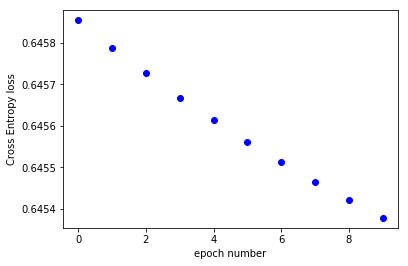

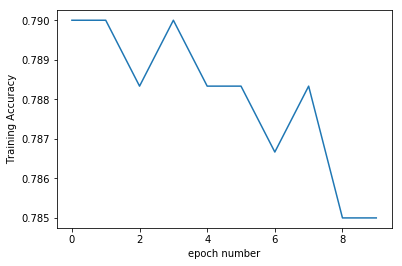

c:\python36\lib\site-packages\ipykernel_launcher.py:196: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


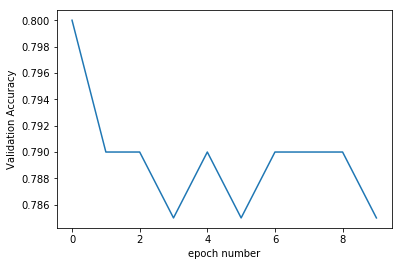

In [43]:
model1.train(trainX, trainY, epochs = 10, learningRate = 0.0001, validationX = validX, validationY = validY)

In [44]:
#model.train(trainX, trainY, epochs = 50, learningRate = 0.0001, validationX = validX, validationY = validY)
test_accuracy = model1.accuracy(testX, testY)
print(test_accuracy)

0.78


At epoch  0 loss is:  [0.93378356] accuracy is:  0.5
At epoch  0 validation accuracy is  0.5


c:\python36\lib\site-packages\ipykernel_launcher.py:181: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


At epoch  1 loss is:  [0.73259905] accuracy is:  0.5
At epoch  1 validation accuracy is  0.5
At epoch  2 loss is:  [0.69949217] accuracy is:  0.5
At epoch  2 validation accuracy is  0.5
At epoch  3 loss is:  [0.69500787] accuracy is:  0.5
At epoch  3 validation accuracy is  0.5
At epoch  4 loss is:  [0.69432916] accuracy is:  0.5
At epoch  4 validation accuracy is  0.5
At epoch  5 loss is:  [0.69416254] accuracy is:  0.5
At epoch  5 validation accuracy is  0.5
At epoch  6 loss is:  [0.69407466] accuracy is:  0.5
At epoch  6 validation accuracy is  0.5
At epoch  7 loss is:  [0.69400251] accuracy is:  0.5
At epoch  7 validation accuracy is  0.5
At epoch  8 loss is:  [0.69393486] accuracy is:  0.5
At epoch  8 validation accuracy is  0.5
At epoch  9 loss is:  [0.69386906] accuracy is:  0.5
At epoch  9 validation accuracy is  0.5
At epoch  10 loss is:  [0.69380434] accuracy is:  0.5
At epoch  10 validation accuracy is  0.5
At epoch  11 loss is:  [0.69374043] accuracy is:  0.5
At epoch  11 v

At epoch  80 loss is:  [0.69014892] accuracy is:  0.5616666666666666
At epoch  80 validation accuracy is  0.505
At epoch  81 loss is:  [0.69010464] accuracy is:  0.56
At epoch  81 validation accuracy is  0.505
At epoch  82 loss is:  [0.69006061] accuracy is:  0.5583333333333333
At epoch  82 validation accuracy is  0.505
At epoch  83 loss is:  [0.69001683] accuracy is:  0.5583333333333333
At epoch  83 validation accuracy is  0.505
At epoch  84 loss is:  [0.68997329] accuracy is:  0.5583333333333333
At epoch  84 validation accuracy is  0.505
At epoch  85 loss is:  [0.68993001] accuracy is:  0.5566666666666666
At epoch  85 validation accuracy is  0.505
At epoch  86 loss is:  [0.68988699] accuracy is:  0.5566666666666666
At epoch  86 validation accuracy is  0.505
At epoch  87 loss is:  [0.68984422] accuracy is:  0.5566666666666666
At epoch  87 validation accuracy is  0.505
At epoch  88 loss is:  [0.68980173] accuracy is:  0.5566666666666666
At epoch  88 validation accuracy is  0.5
At epoch

At epoch  157 loss is:  [0.68765584] accuracy is:  0.5533333333333333
At epoch  157 validation accuracy is  0.5
At epoch  158 loss is:  [0.68763686] accuracy is:  0.5533333333333333
At epoch  158 validation accuracy is  0.5
At epoch  159 loss is:  [0.68761821] accuracy is:  0.5533333333333333
At epoch  159 validation accuracy is  0.5
At epoch  160 loss is:  [0.6875999] accuracy is:  0.555
At epoch  160 validation accuracy is  0.5
At epoch  161 loss is:  [0.6875819] accuracy is:  0.5516666666666666
At epoch  161 validation accuracy is  0.5
At epoch  162 loss is:  [0.68756423] accuracy is:  0.55
At epoch  162 validation accuracy is  0.5
At epoch  163 loss is:  [0.68754689] accuracy is:  0.5483333333333333
At epoch  163 validation accuracy is  0.495
At epoch  164 loss is:  [0.68752986] accuracy is:  0.5483333333333333
At epoch  164 validation accuracy is  0.495
At epoch  165 loss is:  [0.68751315] accuracy is:  0.5483333333333333
At epoch  165 validation accuracy is  0.495
At epoch  166 l

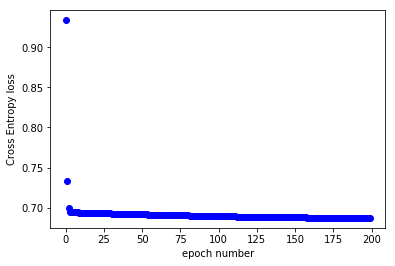

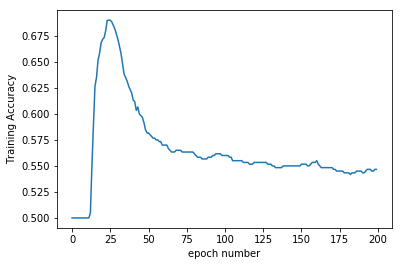

c:\python36\lib\site-packages\ipykernel_launcher.py:196: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


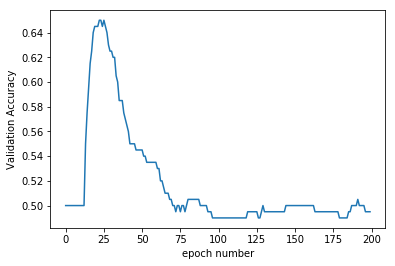

In [58]:
model2 = Neural_Network(2,3,1, 'sigmoid')
model2.train(trainX, trainY, epochs = 200, learningRate = 0.001, validationX = validX, validationY = validY)

In [ ]:
test_accuracy = model2.accuracy(testX, testY)
print(test_accuracy)

c:\python36\lib\site-packages\ipykernel_launcher.py:170: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


Training Accuracy at epoch  0 is  0.5583333333333333
Validation Accuracy at epoch  0 is  0.59
loss at epoch  0 is  [0.72462144]
Training Accuracy at epoch  1 is  0.47333333333333333
Validation Accuracy at epoch  1 is  0.475
loss at epoch  1 is  [0.6955363]
Training Accuracy at epoch  2 is  0.47
Validation Accuracy at epoch  2 is  0.475
loss at epoch  2 is  [0.69550687]
Training Accuracy at epoch  3 is  0.47
Validation Accuracy at epoch  3 is  0.475
loss at epoch  3 is  [0.69547942]
Training Accuracy at epoch  4 is  0.47
Validation Accuracy at epoch  4 is  0.475
loss at epoch  4 is  [0.69545166]
Training Accuracy at epoch  5 is  0.47
Validation Accuracy at epoch  5 is  0.475
loss at epoch  5 is  [0.69542446]
Training Accuracy at epoch  6 is  0.47
Validation Accuracy at epoch  6 is  0.475
loss at epoch  6 is  [0.69539781]
Training Accuracy at epoch  7 is  0.4716666666666667
Validation Accuracy at epoch  7 is  0.475
loss at epoch  7 is  [0.69537169]
Training Accuracy at epoch  8 is  0.473

Training Accuracy at epoch  67 is  0.4866666666666667
Validation Accuracy at epoch  67 is  0.51
loss at epoch  67 is  [0.69433428]
Training Accuracy at epoch  68 is  0.485
Validation Accuracy at epoch  68 is  0.51
loss at epoch  68 is  [0.69431996]
Training Accuracy at epoch  69 is  0.485
Validation Accuracy at epoch  69 is  0.51
loss at epoch  69 is  [0.69430547]
Training Accuracy at epoch  70 is  0.4866666666666667
Validation Accuracy at epoch  70 is  0.51
loss at epoch  70 is  [0.69429081]
Training Accuracy at epoch  71 is  0.4866666666666667
Validation Accuracy at epoch  71 is  0.51
loss at epoch  71 is  [0.69427595]
Training Accuracy at epoch  72 is  0.4866666666666667
Validation Accuracy at epoch  72 is  0.505
loss at epoch  72 is  [0.69426088]
Training Accuracy at epoch  73 is  0.485
Validation Accuracy at epoch  73 is  0.5
loss at epoch  73 is  [0.69424558]
Training Accuracy at epoch  74 is  0.485
Validation Accuracy at epoch  74 is  0.5
loss at epoch  74 is  [0.69423003]
Train

Training Accuracy at epoch  132 is  0.5166666666666667
Validation Accuracy at epoch  132 is  0.57
loss at epoch  132 is  [0.69231196]
Training Accuracy at epoch  133 is  0.5216666666666666
Validation Accuracy at epoch  133 is  0.575
loss at epoch  133 is  [0.69225447]
Training Accuracy at epoch  134 is  0.5216666666666666
Validation Accuracy at epoch  134 is  0.565
loss at epoch  134 is  [0.69219608]
Training Accuracy at epoch  135 is  0.5266666666666666
Validation Accuracy at epoch  135 is  0.56
loss at epoch  135 is  [0.69213679]
Training Accuracy at epoch  136 is  0.525
Validation Accuracy at epoch  136 is  0.56
loss at epoch  136 is  [0.69207659]
Training Accuracy at epoch  137 is  0.5233333333333333
Validation Accuracy at epoch  137 is  0.57
loss at epoch  137 is  [0.69201548]
Training Accuracy at epoch  138 is  0.5233333333333333
Validation Accuracy at epoch  138 is  0.58
loss at epoch  138 is  [0.69195347]
Training Accuracy at epoch  139 is  0.525
Validation Accuracy at epoch  1

Training Accuracy at epoch  195 is  0.725
Validation Accuracy at epoch  195 is  0.72
loss at epoch  195 is  [0.68667892]
Training Accuracy at epoch  196 is  0.7266666666666667
Validation Accuracy at epoch  196 is  0.73
loss at epoch  196 is  [0.68655094]
Training Accuracy at epoch  197 is  0.7283333333333334
Validation Accuracy at epoch  197 is  0.73
loss at epoch  197 is  [0.68642161]
Training Accuracy at epoch  198 is  0.73
Validation Accuracy at epoch  198 is  0.735
loss at epoch  198 is  [0.68629092]
Training Accuracy at epoch  199 is  0.7316666666666667
Validation Accuracy at epoch  199 is  0.735
loss at epoch  199 is  [0.68615887]
Training Accuracy at epoch  200 is  0.7333333333333333
Validation Accuracy at epoch  200 is  0.74
loss at epoch  200 is  [0.68602544]
Training Accuracy at epoch  201 is  0.7316666666666667
Validation Accuracy at epoch  201 is  0.735
loss at epoch  201 is  [0.68589064]
Training Accuracy at epoch  202 is  0.7333333333333333
Validation Accuracy at epoch  2

Training Accuracy at epoch  258 is  0.7033333333333334
Validation Accuracy at epoch  258 is  0.76
loss at epoch  258 is  [0.67539191]
Training Accuracy at epoch  259 is  0.7033333333333334
Validation Accuracy at epoch  259 is  0.76
loss at epoch  259 is  [0.67515779]
Training Accuracy at epoch  260 is  0.7066666666666667
Validation Accuracy at epoch  260 is  0.76
loss at epoch  260 is  [0.67492287]
Training Accuracy at epoch  261 is  0.7066666666666667
Validation Accuracy at epoch  261 is  0.76
loss at epoch  261 is  [0.67468725]
Training Accuracy at epoch  262 is  0.7066666666666667
Validation Accuracy at epoch  262 is  0.76
loss at epoch  262 is  [0.67445107]
Training Accuracy at epoch  263 is  0.7066666666666667
Validation Accuracy at epoch  263 is  0.755
loss at epoch  263 is  [0.67421444]
Training Accuracy at epoch  264 is  0.7066666666666667
Validation Accuracy at epoch  264 is  0.755
loss at epoch  264 is  [0.6739775]
Training Accuracy at epoch  265 is  0.7066666666666667
Valida

Training Accuracy at epoch  322 is  0.6883333333333334
Validation Accuracy at epoch  322 is  0.73
loss at epoch  322 is  [0.66393552]
Training Accuracy at epoch  323 is  0.685
Validation Accuracy at epoch  323 is  0.73
loss at epoch  323 is  [0.66386187]
Training Accuracy at epoch  324 is  0.685
Validation Accuracy at epoch  324 is  0.73
loss at epoch  324 is  [0.6637908]
Training Accuracy at epoch  325 is  0.685
Validation Accuracy at epoch  325 is  0.73
loss at epoch  325 is  [0.66372217]
Training Accuracy at epoch  326 is  0.685
Validation Accuracy at epoch  326 is  0.72
loss at epoch  326 is  [0.66365581]
Training Accuracy at epoch  327 is  0.685
Validation Accuracy at epoch  327 is  0.72
loss at epoch  327 is  [0.66359156]
Training Accuracy at epoch  328 is  0.685
Validation Accuracy at epoch  328 is  0.72
loss at epoch  328 is  [0.66352924]
Training Accuracy at epoch  329 is  0.6816666666666666
Validation Accuracy at epoch  329 is  0.715
loss at epoch  329 is  [0.66346869]
Traini

Validation Accuracy at epoch  386 is  0.54
loss at epoch  386 is  [0.65449049]
Training Accuracy at epoch  387 is  0.54
Validation Accuracy at epoch  387 is  0.545
loss at epoch  387 is  [0.65406486]
Training Accuracy at epoch  388 is  0.5366666666666666
Validation Accuracy at epoch  388 is  0.545
loss at epoch  388 is  [0.65362601]
Training Accuracy at epoch  389 is  0.535
Validation Accuracy at epoch  389 is  0.545
loss at epoch  389 is  [0.65317428]
Training Accuracy at epoch  390 is  0.5333333333333333
Validation Accuracy at epoch  390 is  0.545
loss at epoch  390 is  [0.65271008]
Training Accuracy at epoch  391 is  0.5333333333333333
Validation Accuracy at epoch  391 is  0.54
loss at epoch  391 is  [0.65223393]
Training Accuracy at epoch  392 is  0.5333333333333333
Validation Accuracy at epoch  392 is  0.545
loss at epoch  392 is  [0.6517465]
Training Accuracy at epoch  393 is  0.5316666666666666
Validation Accuracy at epoch  393 is  0.545
loss at epoch  393 is  [0.65124857]
Train

Training Accuracy at epoch  449 is  0.6816666666666666
Validation Accuracy at epoch  449 is  0.68
loss at epoch  449 is  [0.63493866]
Training Accuracy at epoch  450 is  0.6833333333333333
Validation Accuracy at epoch  450 is  0.68
loss at epoch  450 is  [0.63433907]
Training Accuracy at epoch  451 is  0.685
Validation Accuracy at epoch  451 is  0.675
loss at epoch  451 is  [0.63369067]
Training Accuracy at epoch  452 is  0.685
Validation Accuracy at epoch  452 is  0.68
loss at epoch  452 is  [0.63299281]
Training Accuracy at epoch  453 is  0.6866666666666666
Validation Accuracy at epoch  453 is  0.68
loss at epoch  453 is  [0.63224504]
Training Accuracy at epoch  454 is  0.6866666666666666
Validation Accuracy at epoch  454 is  0.685
loss at epoch  454 is  [0.63144709]
Training Accuracy at epoch  455 is  0.685
Validation Accuracy at epoch  455 is  0.685
loss at epoch  455 is  [0.63059887]
Training Accuracy at epoch  456 is  0.685
Validation Accuracy at epoch  456 is  0.685
loss at epoc

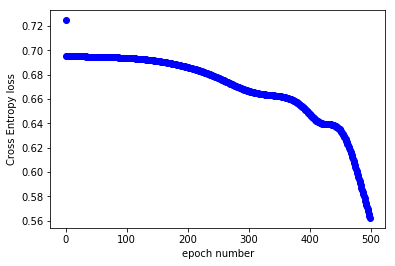

0.8


In [27]:
model = Neural_Network(2,3,1, 'sigmoid')
model.train(trainX, trainY, epochs = 500, learningRate = 0.01, validationX = validX, validationY = validY)
test_accuracy = model.accuracy(testX, testY)
print(test_accuracy)

c:\python36\lib\site-packages\ipykernel_launcher.py:170: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


Training Accuracy at epoch  0 is  0.8216666666666667
Validation Accuracy at epoch  0 is  0.81
loss at epoch  0 is  [0.56040273]
Training Accuracy at epoch  1 is  0.8233333333333334
Validation Accuracy at epoch  1 is  0.81
loss at epoch  1 is  [0.55864614]
Training Accuracy at epoch  2 is  0.825
Validation Accuracy at epoch  2 is  0.815
loss at epoch  2 is  [0.55689699]
Training Accuracy at epoch  3 is  0.8266666666666667
Validation Accuracy at epoch  3 is  0.81
loss at epoch  3 is  [0.55515593]
Training Accuracy at epoch  4 is  0.83
Validation Accuracy at epoch  4 is  0.815
loss at epoch  4 is  [0.5534236]
Training Accuracy at epoch  5 is  0.8316666666666667
Validation Accuracy at epoch  5 is  0.82
loss at epoch  5 is  [0.55170063]
Training Accuracy at epoch  6 is  0.83
Validation Accuracy at epoch  6 is  0.825
loss at epoch  6 is  [0.54998764]
Training Accuracy at epoch  7 is  0.8316666666666667
Validation Accuracy at epoch  7 is  0.825
loss at epoch  7 is  [0.54828524]
Training Accur

Training Accuracy at epoch  66 is  0.8233333333333334
Validation Accuracy at epoch  66 is  0.81
loss at epoch  66 is  [0.47771294]
Training Accuracy at epoch  67 is  0.8233333333333334
Validation Accuracy at epoch  67 is  0.81
loss at epoch  67 is  [0.47702923]
Training Accuracy at epoch  68 is  0.8233333333333334
Validation Accuracy at epoch  68 is  0.81
loss at epoch  68 is  [0.47635879]
Training Accuracy at epoch  69 is  0.8233333333333334
Validation Accuracy at epoch  69 is  0.81
loss at epoch  69 is  [0.47570135]
Training Accuracy at epoch  70 is  0.8233333333333334
Validation Accuracy at epoch  70 is  0.81
loss at epoch  70 is  [0.47505665]
Training Accuracy at epoch  71 is  0.8233333333333334
Validation Accuracy at epoch  71 is  0.81
loss at epoch  71 is  [0.47442445]
Training Accuracy at epoch  72 is  0.8233333333333334
Validation Accuracy at epoch  72 is  0.81
loss at epoch  72 is  [0.47380448]
Training Accuracy at epoch  73 is  0.8233333333333334
Validation Accuracy at epoch 

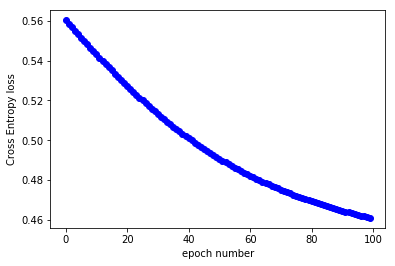

0.805


In [28]:
model.train(trainX, trainY, epochs = 100, learningRate = 0.01, validationX = validX, validationY = validY)
test_accuracy = model.accuracy(testX, testY)
print(test_accuracy)

#### Note: This below section will be used for the evaluation of this task, we need your model and we will run script below to evaluated your model

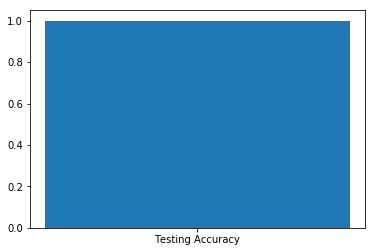

1.0

In [8]:
# create class object
mm = Neural_Network()
# load model which will be provided by you
loaded_model = mm.loadModel('task2_bestmodel.mdl')
# check accuracy of that model
loaded_model.accuracy(testX,testY,test = True)


